In [64]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [65]:
ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "high", "above average", "average", "below average", "low", "Total", "Recognition (%)"]

discretizer = myutils.discretize_ranking

## kNN classification of ski dataset

In [66]:
# TODO: modify categorical method in kNN to be a given list
knn_clf = MyKNeighborsClassifier()

knn_actual, knn_pred, knn_accuracy, knn_error = myevaluation.cross_val_predict\
    (ski_X, ski_y, knn_clf, discretizer=discretizer, n_splits=10, shuffle=True, stratify=True)

myutils.randomize_in_place(knn_actual, knn_pred)
print(knn_actual[:20])
print(knn_pred[:20])

print(f"Accuracy: {knn_accuracy}, Error Rate: {knn_error}")
print()

matrix = myevaluation.confusion_matrix(knn_actual, knn_pred, matrix_headers[1:6])
print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

['low', 'below average', 'average', 'average', 'average', 'average', 'above average', 'below average', 'high', 'high', 'low', 'above average', 'below average', 'average', 'above average', 'high', 'low', 'high', 'average', 'high']
['low', 'below average', 'low', 'above average', 'low', 'below average', 'high', 'below average', 'above average', 'average', 'below average', 'below average', 'below average', 'average', 'average', 'above average', 'low', 'above average', 'low', 'high']
Accuracy: 0.3800243605359318, Error Rate: 0.6199756394640682

rating           high    above average    average    below average    low    Total    Recognition (%)
-------------  ------  ---------------  ---------  ---------------  -----  -------  -----------------
high              144              201        115               28      5      493                 29
above average      27              133        315              138     45      658                 20
average             6               60       

# Naive Bayes Classification

In [67]:
import copy
nb_X = copy.deepcopy(ski_X)
for row in nb_X:
    row[0] = myutils.discretize_elevation(row[0])
    row[1] = myutils.discretize_num_slopes(row[1])
    row[2] = myutils.discretize_snowfall(row[2])
print(nb_X[1])
print(ski_X[1])
nb_clf = MyNaiveBayesClassifier()

nb_actual, nb_pred, nb_accuracy, nb_error = myevaluation.cross_val_predict\
    (nb_X, ski_y, nb_clf, discretizer=discretizer, n_splits=10, shuffle=True, stratify=True)

myutils.randomize_in_place(nb_actual, nb_pred)
print(nb_actual[:20])
print(nb_pred[:20])

print(f"Accuracy: {nb_accuracy}, Error Rate: {nb_error}")
print()

matrix = myevaluation.confusion_matrix(nb_actual, nb_pred, matrix_headers[1:6])
print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

['high', 'high', 'high']
[3899.0, 69.0, 450.0]
['above average', 'average', 'below average', 'below average', 'above average', 'below average', 'low', 'average', 'below average', 'low', 'below average', 'high', 'above average', 'average', 'high', 'above average', 'below average', 'above average', 'below average', 'above average']
['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'below average', 'low', 'low', 'low', 'low', 'low', 'low']
Accuracy: 0.152557856272838, Error Rate: 0.847442143727162

rating           high    above average    average    below average    low    Total    Recognition (%)
-------------  ------  ---------------  ---------  ---------------  -----  -------  -----------------
high                0                0          2               33    458      493                  0
above average       0                1          8               52    597      658                  0
average             0               17         37

In [68]:
# TODO: ask Professor Sprint where part 4 of random forest should be implemented - in predict?
# TODO: ask Professor Sprint how we should handle our categorical decision tree issue - discretizer for X attributes?
forest_clf = MyRandomForestClassifier()

# discretize the output
y_disc = [discretizer(y) for y in ski_y]

# using N=5, M=3, F=2 as a "control"
X_test, y_test = forest_clf.fit(ski_X, y_disc, 5, 3, 2)
forest_pred = forest_clf.predict(X_test)

forest_accuracy = myevaluation.accuracy_score(y_test, forest_pred)
forest_error = 1 - forest_accuracy

forest_actual = y_test

print(f"Accuracy: {forest_accuracy}, Error Rate: {forest_error}")
print()

# matrix = myevaluation.confusion_matrix(forest_actual, forest_pred, matrix_headers[1:8])
# print(myevaluation.tabulate_confusion_matrix(matrix, headers=matrix_headers))

Accuracy: 0.4648401826484018, Error Rate: 0.5351598173515981



## Issues faced
In regards to random forest, we are facing two primary issues. First, predictions sometimes are not being made. This is a bug that will likely be ironed out as we solve the next issue.


Another issue is that continuous attributes are being treated as categorical, which leads to a decision trees with hundreds if not thousands of branches.


In [69]:
# This version tends very much towards average, but we have already addressed this by changing the distributions of the discretizer.
print("actual",y_test[:10])
print("predicted",forest_pred[:10])
print()

tree = forest_clf.forest[0]
# tree.print_decision_rules()

actual ['high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high', 'high']
predicted ['', 'high', 'average', 'high', 'above average', 'high', 'high', 'high', '', '']



Truncated output of tree.print_decision_rules()

IF att1 == 0.0 THEN class = high  
IF att1 == 1.0 THEN class = below average  
IF att1 == 2.0 THEN class = average  
IF att1 == 3.0 THEN class = average  
IF att1 == 4.0 THEN class = average  
IF att1 == 5.0 THEN class = average  
IF att1 == 6.0 THEN class = average  
IF att1 == 7.0 THEN class = above average  
IF att1 == 8.0 THEN class = average  
IF att1 == 9.0 THEN class = above average  
IF att1 == 10.0 THEN class = average

## Data Visualizations

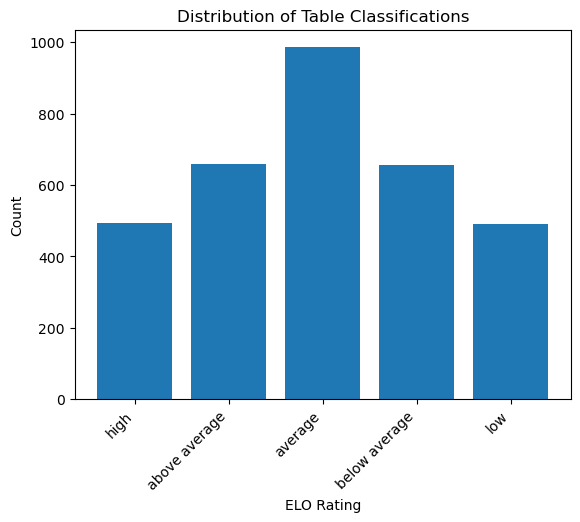

size of knn_pred 3284


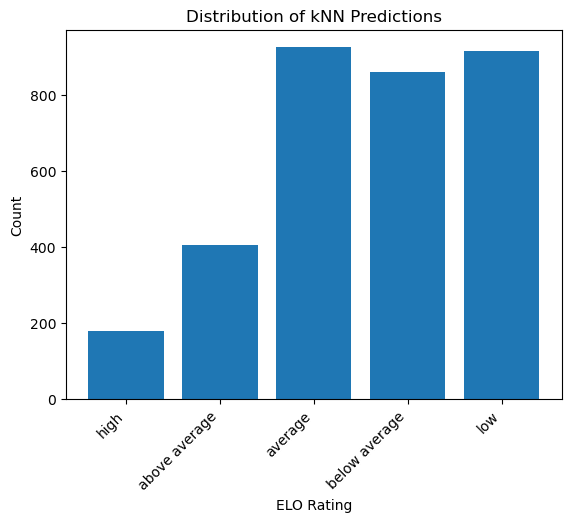

size of np_pred 3284


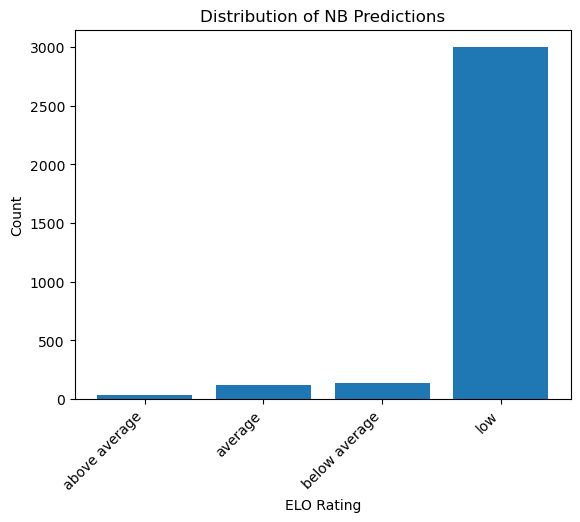

In [ ]:
import matplotlib.pyplot as plt

# will make own method
y_disc = [discretizer(y) for y in ski_y]
values, counts = myutils.get_frequencies(y_disc)

order = [3, 0, 1, 2, 4]
ordered_values = [values[i] for i in order]
ordered_counts = [counts[i] for i in order]

plt.figure()
plt.bar(ordered_values, ordered_counts)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of Table Classifications")
plt.xticks(rotation=45, ha="right")
plt.show()

# knn visualization
values_knn, counts_knn = myutils.get_frequencies(knn_pred)
print("size of knn_pred", len(knn_pred))
ordered_values_knn = [values_knn[i] for i in order]
ordered_counts_knn = [counts_knn[i] for i in order]

plt.figure()
plt.bar(ordered_values_knn, ordered_counts_knn)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of kNN Predictions")
plt.xticks(rotation=45, ha="right")
plt.show()

# nb visualization
values_nb, counts_nb = myutils.get_frequencies(nb_pred)

plt.figure()
plt.bar(values_nb, counts_nb)
plt.xlabel("ELO Rating")
plt.ylabel("Count")
plt.title(f"Distribution of NB Predictions")
plt.xticks(rotation=45, ha="right")
plt.show()